## TikTok Data Summary
A synthetic TikTok dataset containing video transciptions and comments on user claims. This content needs to be reviewed by moderators to determine if the content is a user claim on unverified information or instead offers an opinion on that information.

## Data Dictionary

| Column name              | Type   | Description                                                                                                                                                                                                                                                         |
|--------------------------|--------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| #                        | int    | TikTok assigned number for video with claim/opinion.                                                                                                                                                                                                                |
| claim_status             | obj    | Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source. |
| video_id                 | int    | Random identifying number assigned to video upon publication on TikTok.                                                                                                                                                                                             |
| video_duration_sec       | int    | How long the published video is measured in seconds.                                                                                                                                                                                                                |
| video_transcription_text | obj    | Transcribed text of the words spoken in the published video.                                                                                                                                                                                                        |
| verified_status          | obj    | Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.”                                                                                                                                |
| author_ban_status        | obj    | Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.”                                                                                                                             |
| video_view_count         | float  | The total number of times the published video has been viewed.                                                                                                                                                                                                      |
| video_like_count         | float  | The total number of times the published video has been liked by other users.                                                                                                                                                                                        |
| video_share_count        | float  | The total number of times the published video has been shared by other users.                                                                                                                                                                                       |
| video_download_count     | float  | The total number of times the published video has been downloaded by other users.                                                                                                                                                                                   |
| video_comment_count      | float  | The total number of comments on the published video.                                                                                                                                                                                                                |


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv("tiktok_dataset.csv")

data.head(10)
# data.info()
# data.describe()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


### Inspecting the Data
When inspecting the data we can make some initial observations. We have a lot of quantatative data regarding the video length, view counts, and engagement from users. The most diverse column of data is of course the video transcription text and is core in developing a machine learning model that can properly identify what is a user claim and what is a user opinion. In total there are **19382 rows** with many columns having **19084** `non-null` values. This means there are **298 rows** that will contain at least **1** `null` value in a column. Any arithemtic across data columns needs to be considered carefully as some numeric columns are `int` based datatypes and others are `float` based datatypes. Columns `#` and `video_id` should be considered/converted into an `object` dtype as their numerical reference are not values we will want to perform calculations on.

In [33]:
# Exploring how many unique claims versus opinions are available in this dataset. 
data['claim_status'].value_counts()

# Percentage of each claim status in the dataset
counts_and_percs = data['claim_status'].value_counts(normalize=False).to_frame(name='unique_count')
counts_and_percs['percentage'] = (data['claim_status'].value_counts(normalize=True) * 100).round(2)

counts_and_percs

,unique_count,percentage
claim_status,,
claim,9608,50.35
opinion,9476,49.65


In [34]:
# Claim Mean & Median
claim_mask = data['claim_status'] == 'claim'
df_claim_mask = data[claim_mask]
print("Mean view count for claims:", df_claim_mask['video_view_count'].mean().round(2))
print("Median view count for claims:", df_claim_mask['video_view_count'].median())

print("")

# Opinion Mean & Median
opinion_mask = data['claim_status'] == 'opinion'
df_opinion_mask = data[opinion_mask]
print("Mean view count for opinions:", df_opinion_mask['video_view_count'].mean().round(2))
print("Median view count for opinions:", df_opinion_mask['video_view_count'].median())

Mean view count for claims: 501029.45
Median view count for claims: 501555.0

Mean view count for opinions: 4956.43
Median view count for opinions: 4953.0


### Summary for Claim Status ('claim_status')

Initially, we see that there is a near even split with the **unique** counts for the two different claim statuses of `claim` and `opinion` in the `claim_status` column. Claims are representative at `50.35%` and opinions are at `49.65%`. We see similar balanced statistics with the mean and median of both claim statuses. We can conclude that neither status is represented in a lopsided way that would skew results later towards one or the other. This also means that we don't have to worry about outliers since the mean and median are roughly the same. However, while the unique values are evenly split we do see that mean view counts are drastically different. The mean view count for claims is about `501029` and the mean view count for opinions is about `4956`. There are **100x** more claims than opinions. 

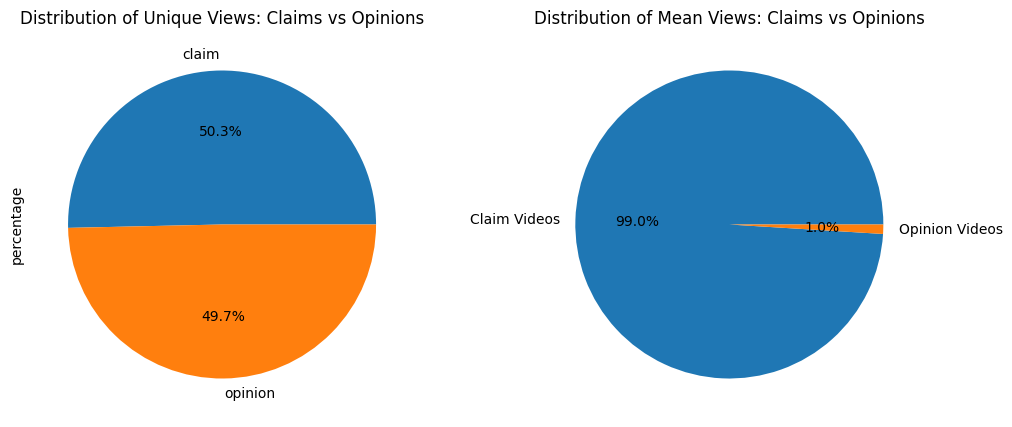

In [35]:
# Plot both charts side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Unique View Counts
counts_and_percs['percentage'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Distribution of Unique Views: Claims vs Opinions')

# Mean View Counts
mean_claim_views = df_claim_mask['video_view_count'].mean().round(2)
mean_opinion_views = df_opinion_mask['video_view_count'].mean().round(2)

mean_counts = pd.Series({
    'Claim Videos': mean_claim_views,
    'Opinion Videos': mean_opinion_views
})

mean_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Distribution of Mean Views: Claims vs Opinions')

plt.show()

### 'Claim Status' and 'Author Ban Status' Breakdown
Below, we can see a clearer breakdown of the ban statuses of the authors of the videos versus the claim status. We can see that there are many more `claim` videos with banned authors than there are `opinion` videos with banned authors. We can infer that `claim` videos are more closely scutinzed than `opinion` videos which would make sense since `claim` videos are intentionally meant to be presented as more factual than `opinion` videos are. We don't know the contents of the videos themselves (yet) so we do not know if this inference is strictly true as the bans could be for other bad actor actions. 

In [36]:
# Counts for each ban status for each claim status
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

In [37]:
# Mean and Median for Video Engagement
data.groupby(['author_ban_status']).agg(
    {
        'video_view_count': ['mean', 'median'],
        'video_like_count': ['mean', 'median'],
        'video_share_count': ['mean', 'median']
    }
).round(2)

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active                   215927.04    8616.0         71036.53    2222.0   
banned                   445845.44  448201.0        153017.24  105573.0   
under review             392204.84  365245.5        128718.05   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                     14111.47    437.0  
banned                     29998.94  14468.0  
under review               25774.70   9444.0

In [38]:
# New columns to show likes, comments, and shares per view
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

In [39]:
# Determine engagement metrics per claim status and author_ban_status  
data.groupby(['claim_status', 'author_ban_status']).agg(
    {
        'likes_per_view': ['count', 'mean', 'median'],
        'comments_per_view': ['count', 'mean', 'median'],
        'shares_per_view': ['count', 'mean', 'median']
    }
)

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

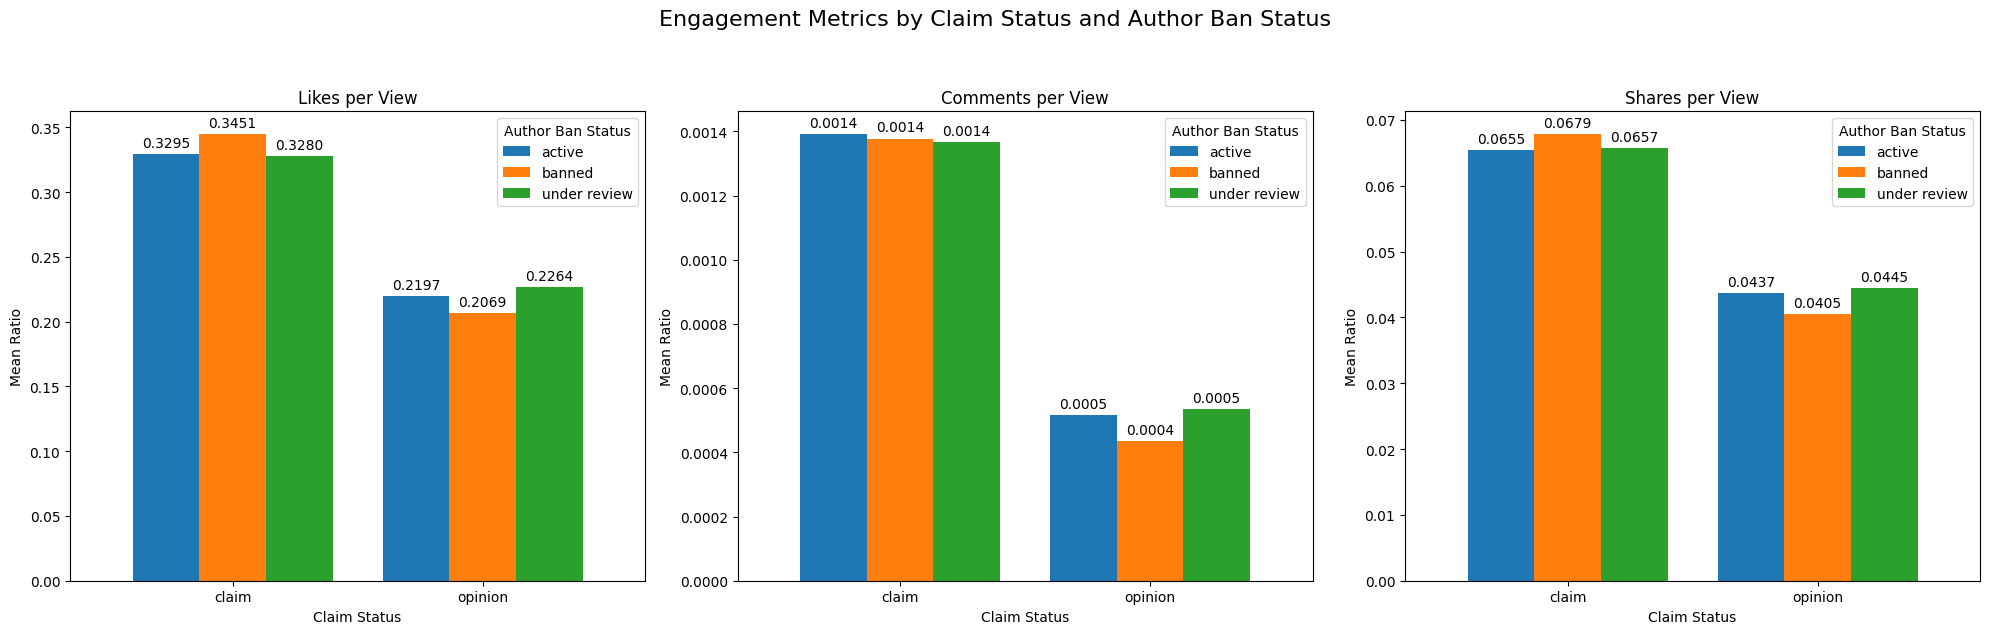

In [40]:
# Create a figure with subplots for each engagement metric
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Engagement Metrics by Claim Status and Author Ban Status', fontsize=16, y=1.05)

metrics = ['likes_per_view', 'comments_per_view', 'shares_per_view']
titles = ['Likes per View', 'Comments per View', 'Shares per View']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    # Get mean values for the metric
    plot_data = data.groupby(['claim_status', 'author_ban_status'])[metric].mean().unstack()
    
    # Create bar plot
    plot_data.plot(kind='bar', ax=axes[i], width=0.8)
    
    axes[i].set_title(title)
    axes[i].set_xlabel('Claim Status')
    axes[i].set_ylabel('Mean Ratio')
    axes[i].legend(title='Author Ban Status')
    axes[i].tick_params(axis='x', rotation=0)
    
    # Add value labels on top of bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.4f', padding=3)

plt.tight_layout()
plt.show()


### Summary of Engagement Analysis
Initially, we could see that `claim` videos were much more likely to be watched than `opinion` videos especially if the video was made by `banned` or `under review` authors. However, we can see here that after a video is viewed the engagement stats surrounding the video favor `active` status authors over `banned` or `under review` authors. `Opinion` videos by active authors have a lower average engagement rate across all categories compared to `claim` videos but a lower overall count comapred to `opinion` videos. Uniquely, `banned` authors for `claim` videos have a slightly higher `like_per_view` average compared to `active` authors while `under review` authors are on par with `active` authors. We can infer that the overall higher average of likes across all statuses may have to do with content directly which is something worth looking more into. 